# Digital Image Processing Using OpenCV And Python.  

Digital Image Processing means processing digital image in order to get enhanced image either to extract some useful information. An image is nothing more than a two dimensional(2-D) matrix in case of black and white and three dimensional(3-D) in case of coloured images,  which is defined by the mathematical function f(x,y) where x and y are the two co-ordinates horizontally and vertically. The value of f(x,y) at any point is gives the pixel value at that point of an image, the pixel value describes how bright that pixel is, and/or what color it should be.


For grayscale images the pixel value is a single number that represents the brightness of that pixel, the most common pixel format is the byte image, which is stored as an 8-bit integer giving a range of possible values from 0 to 255. As a convention is taken to be black, and 255 is taken to be white the values in between make up the different shades of gray.
To represent color images, separate red, green and blue components must be specified for each pixel (assuming a RGB color model), and so the pixel 'value’ becomes a vector of three numbers. Often the three different components are stored as three separate 'grayscale' images known as color planes (one for each of red, green and blue), which have to be recombined when displaying or processing.

We are going to use Open Computer Vision (OpenCV) library for carrying out various operations on image and matplotlib.pyplot library to visualize image. Numpy for dealing with matrix.

# Import Libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Image Acquisition

The 'imread' function from OpenCV lets us read the pixels of a image acquiring.

    flag:way in which image should be read.

In [90]:
img1 = cv.imread('Tom&Jerry.jpg')#(image_source,flag)

#  Displaying The Image

To give the plot a name use plt.title('Window/Frame_title_here') .
Genrally, while plotting the image is plotted as a 2-D graph, It represents the pixel(x,y) on the window/frame.
To disable the scale on X-axis --> 'plt.xticks([ ])' and on --> Y-axis 'plt.ticks([ ])'


So far we acquire the image using openCV but here we will need to use 'mathplotlib.pyplot' to display the image into jupyter notebook itself for that we use the imshow() function in pyplot module of matplotlib library which is used to display data as an image plt.imshow(image_source).

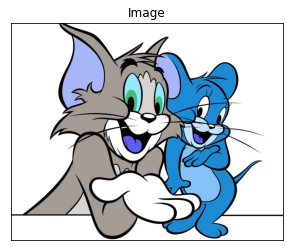

In [91]:
def image():    
    plt.title('Image')
    plt.xticks([]),plt.yticks([])
    plt.imshow(img1)#(image_source)

image()

NOTE: OpenCV reads the pixel of image in BGR (Blue,Green,Red) format and while plotting the pixels, matplotlib.pyplot by defalult uses RBG(Red,Blue,Green) format. so, we will have to convert the format of image using a inbuilt function in OpenCV shown below.

Further on we will be converting the image pixels as per requirments.

In [92]:
img  = cv.cvtColor(img1, cv.COLOR_BGR2RGB)#(source_image, flag)

Initiallizing globally so that it can be accessibe throughout.
The cvtColor function lets you convert the colour of pixels as per the flag value.


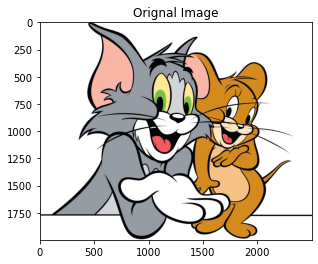

In [93]:
def orignal_image():
    
    plt.title('Orignal Image')
    #plt.xticks([]),plt.yticks([])
    plt.imshow(img)
    plt.show()
    
orignal_image()

# Changing Color Space

Here, we will implement changing the color space of a image, As there are number of flags to change the colour space we will just convert the image pixels from RGB to gray and BGR to gray.  


You can list the number of flags to change the colour space by using the below commented code.

In [94]:
# flags = [i for i in dir(cv) if i.startswith('COLOR_')]
# print (flags) 

So, while we convert the image from BRG to Gray  we need to remember that 'mathplotlib.pyplot' uses the RBG format for that the pixel values are mixed matched. 

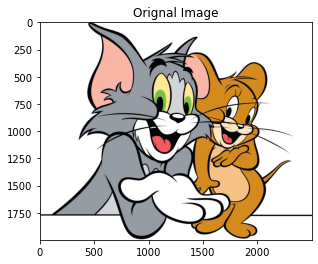

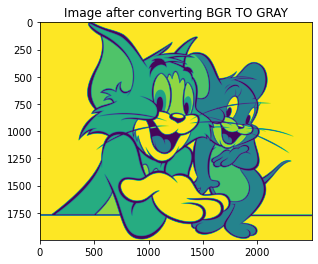

In [95]:
#BGR TO GRAY without color map(cmap)

def gray(): 
    
    gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)# cv2.cvtColor(image_source, flag) where flag determines the type of conversion.
    
    plt.title('Image after converting BGR TO GRAY')
#     plt.xticks([]),plt.yticks([])
    plt.imshow(gray_img)  
    plt.show()
    
orignal_image()
gray()

To over come this we will pass a parameter colour map i.e. cmap = 'gray' in the plt.imshow function. 

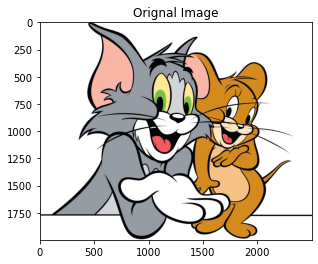

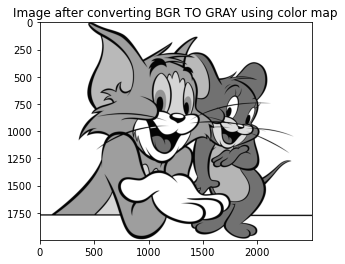

In [96]:
#BGR TO GRAY with color map(cmap)

def img2gray():
    
    
    gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    
    plt.title('Image after converting BGR TO GRAY using color map')
    plt.imshow(gray_img,cmap = 'gray')
    
#     plt.xticks([]),plt.yticks([])
    

orignal_image()
img2gray()

# Cropping Image

To get the dimension of the acquired image use 'img.shape'. This will get you the height width and the number of channels the image has which will be helpful for cropping the image.

 Height of image: 1999 
 Width  of image: 2500 
 Number of channels: 3


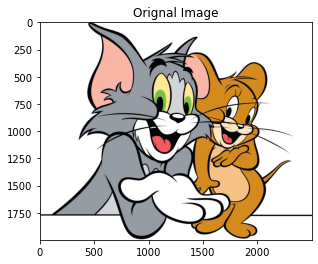

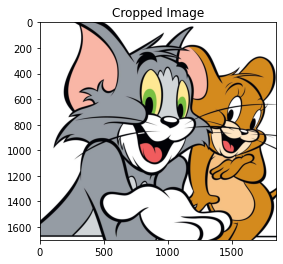

In [97]:
#Cropping Image

height,width,channel=img.shape #getting the dimension of the image and storing in the respective variables.
print(' Height of image: '+str(height), '\n Width  of image: ' +str(width),'\n Number of channels: '+str(channel))#str()for covnerting from numeric to string.


def img_crop():
    
    cropped_image = img[100:1800, 250:2100] #[start column:end column, start row: end row]
    plt.title('Cropped Image')
    plt.imshow(cropped_image , cmap = 'gray')

orignal_image()
img_crop()

# Detecting Edges

OpenCV lets you detect the edges in a image using a OpenCV function knows as Canny(source_image, min_value, max_value).
The first argument is our input image. Second and third arguments are our minVal and maxVal respectively.

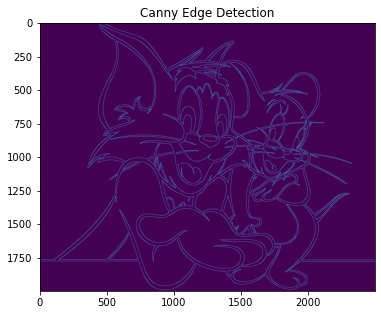

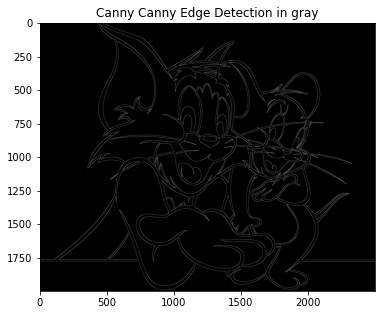

In [98]:
#Detecting Edges

def canny():
    
    canny_img = cv.Canny(img, 100, 200)

    plt.figure(figsize=(6,6))
    plt.imshow(canny_img)
    plt.title('Canny Edge Detection')
#     plt.xticks([]),plt.yticks([])


    plt.figure(figsize=(6,6))
    plt.imshow(canny_img, cmap = 'gray')
    plt.title('Canny Canny Edge Detection in gray')
#     plt.xticks([]),plt.yticks([])
    

canny()

# Thresholding Image

Thresholding simply means setting a limit. Here, we will threshold the value of pixels in a image using threshold functionalities.

In OpenCV there are various flags to threshold in different manner we will use 'TRESH_BINARY' for tresholding.
First argument is the source image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maximum Value which represents the value to be given if pixel value is more than (sometimes less than) the threshold value and the fourth argument is the flag which in this case is 'THRESH_BINARY'.

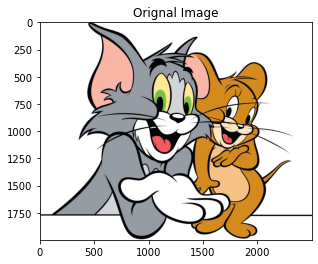

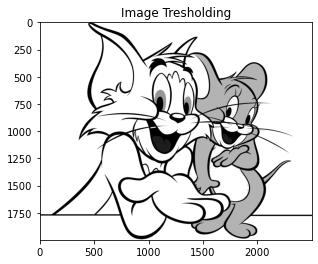

In [99]:
#Image Tresholding

def threshold_image():  
    
    ret, threshold_image1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
    threshold_image = cv.cvtColor(threshold_image1,cv.COLOR_BGR2GRAY)
    
    plt.title('Image Tresholding')
    plt.imshow(threshold_image,cmap='gray')    

orignal_image()
threshold_image()

# Soothing Image

To achieve soothing a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd, when they increase, the blur effect increases. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively.

If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.

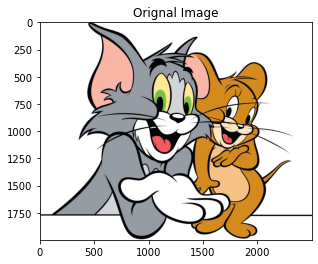

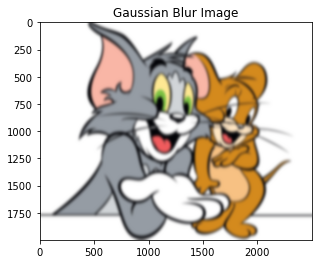

In [100]:
# Gaussian Filtering

def gaussianblur_image():
    gblur_image = cv.GaussianBlur(img, (71,91),0)
    plt.title('Gaussian Blur Image')
    plt.imshow(gblur_image)

orignal_image()
gaussianblur_image()

cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise. One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a positive odd integer.

In this demo, we add a 50% noise to our original image and use a median filter. 

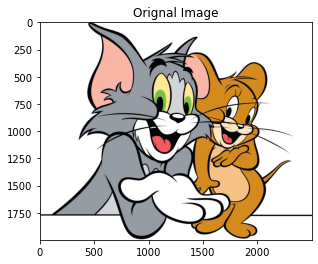

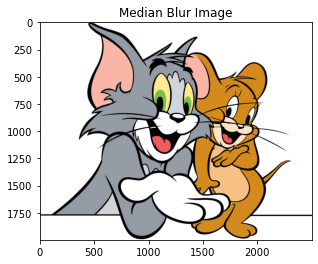

In [101]:
#Median Filtering

def medianblur_image():
    mblur_image = cv.medianBlur(img,7)
    plt.title('Median Blur Image')
    plt.imshow(mblur_image)

orignal_image()
medianblur_image()

# Image Histogram

Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.

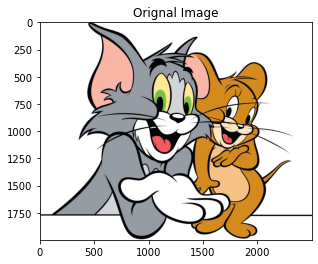

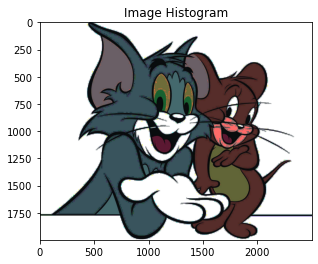

In [102]:
#Histogram Equalization

def image_histogram():
    
    R, G, B = cv.split(img)
    
    output1_R = cv.equalizeHist(R)
    output1_G = cv.equalizeHist(G)
    output1_B = cv.equalizeHist(B)

    hist_img = cv.merge((output1_R, output1_G, output1_B))
    plt.title('Image Histogram')
    plt.imshow(hist_img)
    
orignal_image()
image_histogram()


# Image Rotation

Image rotation takes place by linear mapping pixel of the image.

To do so, we need to calculate the affine matrix that does the affine transformation (linear mapping of pixels), then warp the input image with the affine matrix.

Note: Please observe that the dimensions of the resulting image are provided same as that of the original image. When you are rotating by 90 or 270 and would to affect the height and width as well. swap height with width and width with height.
For the image to fit the window/frame we will have to scale/shrink the image.  

image dimension = (1999, 2500, 3)


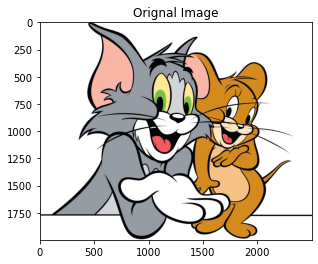

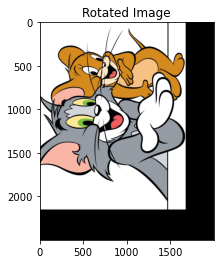

In [103]:
#Image Rotation

#(point of rotation in this case => center,degree of rotation=>90,scaling/shrinking to fit image in frame or window)
print('image dimension = '+ str(img.shape))#height,width and number of channels of img matrix


def rotate_img():
    height,width = img.shape[0:2]
    rotationMatrix = cv.getRotationMatrix2D((height/2, width/2), 90,0.9)#(center,rotation degree,scale value)
    rotated_Image = cv.warpAffine(img, rotationMatrix, (height, width))#(img_source,rotation_matrix,(height, width))
    plt.title('Rotated Image')
    plt.imshow(rotated_Image)
    
orignal_image()
rotate_img()

# Morphological Transformations

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation.

For this we will use another black and white Image which onlu contains '0'(zeros) and '1'(ones).This will let us see the differences clearly.

NOTE : kernal is numpy array of 5 rows and 5 column which is converted to uint8(unsigned integer 8) data type. If X is already an unsigned integer of the same class, then uint* has no effect.

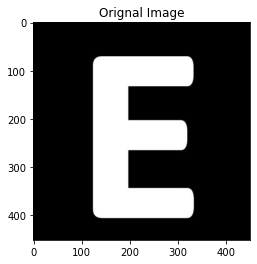

In [104]:
#Using Black and white Image

img = cv.imread('E.jpg',1)
kernel = np.ones((5,5),np.uint8)#ones=> making pixels representing 1 erode  ==  zeros=> making pixels representing 0 erode


def BW_image():

    plt.title('Orignal Image')
    plt.imshow(img)
    plt.show()
BW_image()

EROSION:
Erosion is a  process in which the boundaries of foreground object are eroded (Always try to keep foreground in white).
The kernel slides through the image (as in 2D convolution).
A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1,otherwise it is eroded (made to zero).

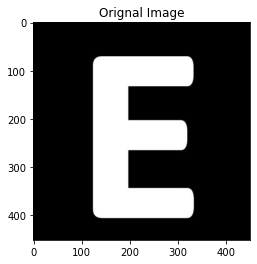

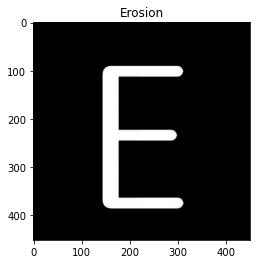

In [105]:
#Image Erosion

def img_erosion():
    erosion = cv.erode(img,kernel,iterations =10)
    plt.title('Erosion')
    plt.imshow(erosion)

BW_image()
img_erosion()



DILATION:It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases.

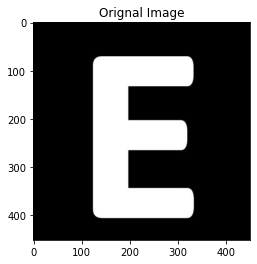

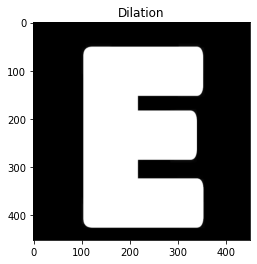

In [79]:
def img_dilation():
    dilation = cv.dilate(img,kernel,iterations = 10)#(img_source,kernal,number of iteration to dialte)
    plt.title('Dilation')
    plt.imshow(dilation)
    
orignal_image()
img_dilation()

MORPHOLOGICAL GRADIENT:It is the difference between dilation and erosion of an image.

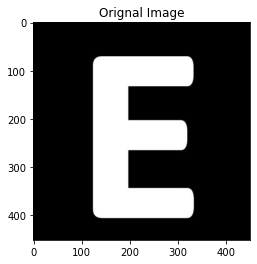

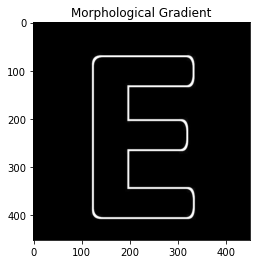

In [80]:
def gradient():
    gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)#(img_source,flag,kernal)
    plt.title('Morphological Gradient')
    plt.imshow(gradient)
orignal_image()
gradient()